# Day 4: Exercises from the course "Machine Vision using Python (MVUP01)"

**Sessions**: (7) Building Deep Learning Models with TensorFlow/Keras; (6) Image Processing with OpenCV: Filters, Edge Detection & Contours.

**Instructor**: Gabriel Rodrigues Palma

**Objective**: This day introduces participants to the core libraries used in machine vision tasks. OpenCV is used for image processing, and TensorFlow is used for building deep learning models.

# Section 7: Building Deep Learning Models with TensorFlow/Keras

### Deep Neural Networks

In [7]:
import tensorflow as tf
import numpy as np
import os
import math
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Dense, Dropout, LeakyReLU, Conv2D, 
                                     BatchNormalization, Activation, MaxPool2D, 
                                     Flatten, GlobalMaxPooling2D)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

TensorFlow version: 2.16.2
Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset using scikit‑learn and convert to a pandas DataFrame
data_breast = load_breast_cancer()
X_breast = pd.DataFrame(data_breast.data, columns=data_breast.feature_names)
y_breast = pd.Series(data_breast.target)

In [9]:
def build_and_train_model(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Input((X_train.shape[1],)))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    
    history = model.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_test, y_test))
    return history

In [10]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X_breast, y_breast, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the model
history_breast = build_and_train_model(X_train, y_train, X_test, y_test)

In [16]:
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris data and convert to pandas DataFrame
data_iris = load_iris()
iris_df = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
iris_df['target'] = data_iris.target

# Filter to include only two classes (e.g., 0 and 1 for binary classification)
iris_bin = iris_df
X_iris = iris_bin.drop('target', axis=1)
y_iris = iris_bin['target']

In [17]:
np.unique(y_iris)

array([0, 1, 2])

In [18]:
def build_and_train_model(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Input((X_train.shape[1],)))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    
    history = model.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_test, y_test))
    return history

In [19]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Train the model
history_iris = build_and_train_model(X_train, y_train, X_test, y_test)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4383 - loss: 0.7787 - val_accuracy: 0.4333 - val_loss: 0.8324
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5640 - loss: 0.6756 - val_accuracy: 0.4333 - val_loss: 0.7315
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5550 - loss: 0.5858 - val_accuracy: 0.4667 - val_loss: 0.6319
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5920 - loss: 0.5468 - val_accuracy: 0.4667 - val_loss: 0.5414
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5730 - loss: 0.4669 - val_accuracy: 0.5000 - val_loss: 0.4639
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5772 - loss: 0.3940 - val_accuracy: 0.5333 - val_loss: 0.3885
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5883 - loss: 0.3714 - val_accuracy: 0.5667 - val_loss: 0.3186
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5898 - loss: 0.3670 - val_accuracy: 0.6000 - v

In [28]:
!ls

Day4_ TensorFlow.ipynb Day4_OpenCV.ipynb      input_data


In [30]:
# Load the wine quality dataset (ensure 'winequality-red.csv' is available in your directory)
df_wine = pd.read_csv('input_data/winequality-red.csv', sep=';')


FileNotFoundError: [Errno 2] No such file or directory: 'input_data/winequality-red.csv'

In [25]:
# Load the wine quality dataset (ensure 'winequality-red.csv' is available in your directory)
df_wine = pd.read_csv('input_data/winequality-red.csv', sep=';')

# Convert the quality scores into a binary target.
# For example, consider wines with quality >= 6 as "good" (1) and the rest as "bad" (0)
df_wine['is_good'] = (df_wine['quality'] >= 6).astype(int)

# Define features and target
# Drop both the original quality column and the new binary column if not needed as feature
X_wine = df_wine.drop(['quality', 'is_good'], axis=1)
y_wine = df_wine['is_good']

# Split the data into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)

FileNotFoundError: [Errno 2] No such file or directory: 'input_data/winequality-red.csv'

## Plant Disease Detection

In [42]:
# Other ways to write your functions
from tensorflow import keras
from keras import Sequential
from keras.layers import LeakyReLU, Conv2D, Input, BatchNormalization, Activation, Dropout, Dense, MaxPool2D, Flatten, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [54]:
def get_images_labels_features(directory, sample_count, new_image_shape = (244, 244)):
    '''Loads and crop the images according the appropriate conditions. Also, it returns the feature and labels of the VGG16 predictions'''
        
    images = np.zeros(shape=(sample_count, new_image_shape[0], new_image_shape[1], 3))    
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size = new_image_shape,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = True,
                                            seed=0)
    i = 0

    for inputs_batch, labels_batch in generator:
                            
        images[i * batch_size : (i + 1) * batch_size] = inputs_batch        
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1

        if i * batch_size >= sample_count:

             break
    return(images, labels)

def get_train_test_data(base_dir = 'input_data/DipteraDataset',
                        train_sample_size = 100, test_sample_size = 100, 
                        new_image_shape = (244, 244)):
    '''This function imports the dataset and split into train and test data return the features and labels of the images'''
        
    
    # Importing images data
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    datagen = ImageDataGenerator(rescale=1./255)
    batch_size = 20    

    # Getting data features and labels    
    train_information = get_images_labels_features(directory = train_dir, 
                                                   sample_count = train_sample_size, 
                                                   new_image_shape = new_image_shape)    
    train_images = train_information[0]
    train_labels = train_information[1]
    
    test_information = get_images_labels_features(directory = test_dir, 
                                                  sample_count = test_sample_size, 
                                                  new_image_shape = new_image_shape)    
    test_images = test_information[0]
    test_labels = test_information[1]

    # Preparing data features    
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)        
        
    return(train_images, train_labels, test_images, test_labels)

In [55]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    zoom_range = 0.1,
    shear_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 25,
    validation_split = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
valid_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

train_dataset = train_datagen.flow_from_directory(
    './PlantVillageDataset/PlantVillage',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'training',
    seed = 42
)
valid_dataset = valid_datagen.flow_from_directory(
    './PlantVillageDataset/PlantVillage',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'validation',
    seed = 42
)
train_dataset.class_indices

Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.


{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'PlantVillage': 2,
 'Potato___Early_blight': 3,
 'Potato___Late_blight': 4,
 'Potato___healthy': 5,
 'Tomato_Bacterial_spot': 6,
 'Tomato_Early_blight': 7,
 'Tomato_Late_blight': 8,
 'Tomato_Leaf_Mold': 9,
 'Tomato_Septoria_leaf_spot': 10,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 11,
 'Tomato__Target_Spot': 12,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 13,
 'Tomato__Tomato_mosaic_virus': 14,
 'Tomato_healthy': 15}

In [58]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
train_images, train_labels, test_images, test_labels = get_train_test_data(base_dir = './PlantVillageDataset/PlantVillage',
                                                                               train_sample_size = 33027, test_sample_size = 8249, 
                                                                               new_image_shape = (224, 224))

FileNotFoundError: [Errno 2] No such file or directory: './PlantVillageDataset/PlantVillage/train'

In [34]:
# Determine how many batches there are in one epoch.
num_batches = math.ceil(train_dataset.n / train_dataset.batch_size)
num_batches

1033

Batch 1: Images shape: (32, 224, 224, 3), Labels shape: (32, 16)


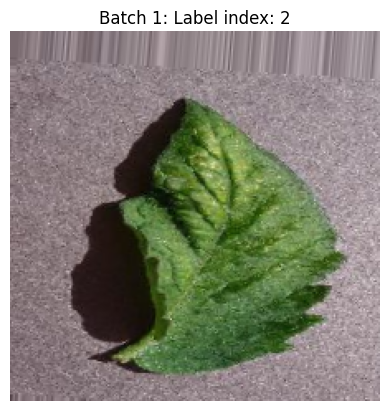

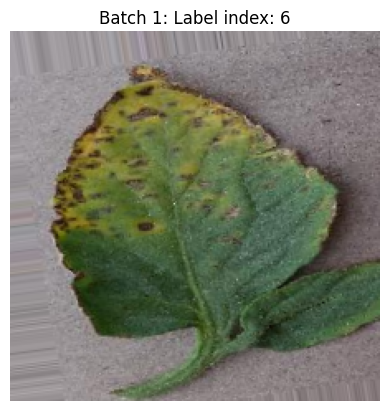

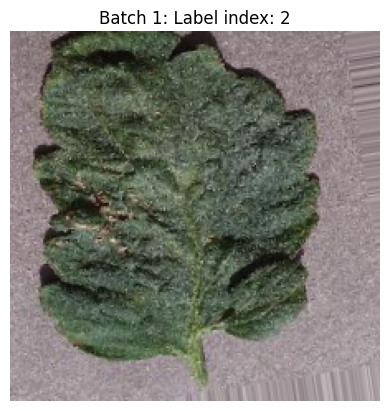

In [35]:
# Determine how many batches there are in one epoch.
#num_batches = math.ceil(train_dataset.n / train_dataset.batch_size)
num_batches = 1
# Loop through each batch
for i in range(num_batches):
    images, labels = next(train_dataset)
    print(f"Batch {i+1}: Images shape: {images.shape}, Labels shape: {labels.shape}")
    # Optionally, display a few images from the current batch
    for j in range(min(3, images.shape[0])):
        plt.imshow(images[j])
        plt.title(f"Batch {i+1}: Label index: {labels[j].argmax()}")
        plt.axis('off')
        plt.show()

In [36]:
np.max(images)

0.9971519

In [46]:
# -----------------------------
# 2. Load the VGG16 Convolutional Base
# -----------------------------
# Create the VGG16 model without the fully-connected layers (include_top=False)
# and specify an input shape of (32, 32, 3) as per the question.
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False

x = Flatten()(conv_base.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(768, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(15, activation='softmax')(x)

model = tf.keras.Model(inputs=conv_base.input, outputs = x)
model.summary()

In [48]:
# -----------------------------
# 3. Prepare for compiling the model
# -----------------------------
# Pass the images through the VGG16 base.
# The output shape for 32x32 images will be (None, 1, 1, 512) because VGG16 has five max pooling layers.
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [49]:
# -----------------------------
# 4. Preparing some callback points
# -----------------------------
# Create a simple neural network that takes the extracted features as input.
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('checkpoint.keras', monitor='val_loss', save_best_only=True, mode='min')


In [51]:
# -----------------------------
# 5. Train the Neural Network
# -----------------------------
history = model.fit(train_dataset, 
                    validation_data = valid_dataset, 
                    epochs=25, callbacks = [earlystopping, learning_rate, checkpoint])

# -----------------------------
# 6. Evaluate the Model on Test Data
# -----------------------------
test_loss, test_acc = model.evaluate(features_test, y_test, verbose=0)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x31de192b0>

# Section 6: Convolutional Neural Networks (CNNs) for Image Classification

In [ ]:
# Multiclass classification with mnist

In [137]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [138]:
train_images.shape

(60000, 28, 28)

In [139]:
# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [140]:
# Expand the dimensions to include a channel (for consistency with models expecting 3D images)
# Although Fashion MNIST is grayscale, some operations expect shape (batch, height, width, channels)
train_images = np.expand_dims(train_images, -1)  # New shape: (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, -1)    # New shape: (10000, 28, 28, 1)

In [153]:
test_images.shape

(10000, 28, 28, 1)

In [151]:
cnn = Sequential()
cnn.add(Input((28, 28, 1)))

cnn.add(Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
cnn.add(Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
cnn.add(MaxPool2D(2))

cnn.add(Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
cnn.add(Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
cnn.add(MaxPool2D(2))

cnn.add(Flatten())
cnn.add(Dense(20, activation =LeakyReLU(alpha=0.3)))
cnn.add(Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 5)      │           455 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 10)     │           460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 5)        │           455 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 20)             │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,300 (12.89 KB)

 Trainable params: 3,300 (12.89 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
## Other loss functions
cnn.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [155]:
cnn_data = cnn.fit(train_images[0:5000, :, :, :], to_categorical(train_labels[0:5000]), 
                    batch_size=32, epochs=20,
                    validation_data=(test_images[0:5000, :, :, :], to_categorical(test_labels[0:5000])))

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - acc: 0.3038 - loss: 1.8990 - val_acc: 0.6754 - val_loss: 0.8296
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.7157 - loss: 0.7559 - val_acc: 0.7338 - val_loss: 0.7221
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.7560 - loss: 0.6542 - val_acc: 0.7390 - val_loss: 0.6938
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.7711 - loss: 0.6217 - val_acc: 0.7496 - val_loss: 0.6692
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.7970 - loss: 0.5686 - val_acc: 0.7582 - val_loss: 0.6496
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.7877 - loss: 0.5577 - val_acc: 0.7644 - val_loss: 0.6416
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.7956 - loss: 0.5560 - val_acc: 0.7712 - val_loss: 0.6285
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.8106 - loss: 0.5253 - val_acc: 0.7654 - val_loss: 0.6259
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/

<Axes: >

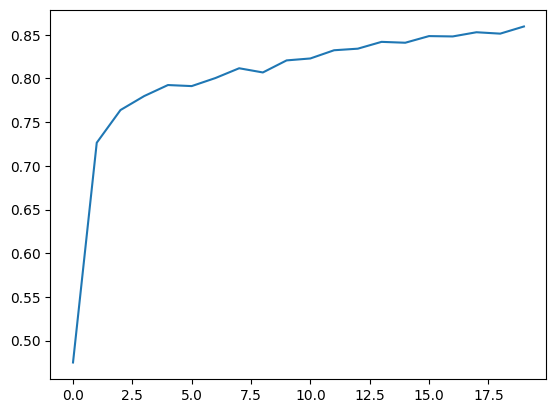

In [156]:
exploratory_performance = pd.DataFrame(cnn_data.history)
exploratory_performance['acc'].plot()

In [ ]:
## Transfer Learning option

In [226]:
from keras.applications.vgg16 import VGG16

In [230]:
conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(28, 28, 3))
# End Importing images data
conv_base.summary()

ValueError: Input size must be at least 32x32; Received: input_shape=(28, 28, 3)

In [231]:
fashion_mnist = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [232]:
train_images.shape

(50000, 32, 32, 3)

In [233]:
conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(32, 32, 3))
# End Importing images data
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Transfer learning

In [236]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## VGG16

In [239]:
# -----------------------------
# 1. Load and Preprocess Dataset
# -----------------------------
# Here we load CIFAR-10 as requested.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert images to float32 type.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_test.shape)

# Preprocess using VGG16 expected preprocessing.
# This function converts the images from RGB to BGR and zero-centers each color channel
# Normalize the pixel values to the range [0, 1]
x_train = train_images.astype("float32") / 255.0
x_test = test_images.astype("float32") / 255.0


(10000, 32, 32, 3)


In [240]:
# -----------------------------
# 2. Load the VGG16 Convolutional Base
# -----------------------------
# Create the VGG16 model without the fully-connected layers (include_top=False)
# and specify an input shape of (32, 32, 3) as per the question.
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.summary()  # optional: prints model summary


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [241]:
# -----------------------------
# 3. Extract Features Using conv_base
# -----------------------------
# Pass the images through the VGG16 base.
# The output shape for 32x32 images will be (None, 1, 1, 512) because VGG16 has five max pooling layers.
features_train = conv_base.predict(x_train, batch_size=32, verbose=1)
features_test = conv_base.predict(x_test, batch_size=32, verbose=1)

# Flatten the extracted features so that each example is represented by a 1D vector.
features_train = features_train.reshape(features_train.shape[0], -1)  # shape: (50000, 512)
features_test = features_test.reshape(features_test.shape[0], -1)     # shape: (10000, 512)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [ ]:
features_train.shape

In [245]:
# -----------------------------
# 4. Build a Simple Neural Network Classifier
# -----------------------------
# Create a simple neural network that takes the extracted features as input.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
model.add(Dropout(0.5)) # Dropout for regularization
model.add(Dense(10, activation='softmax'))# 10 output classes for CIFAR-10

# Compile the model with an appropriate loss and optimizer.
# Using sparse_categorical_crossentropy works directly with integer labels.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # optional: prints your classifier model summary

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,898 (523.04 KB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 0 (0.00 B)

In [246]:
features_train.shape

(50000, 512)

In [250]:
# -----------------------------
# 5. Train the Neural Network
# -----------------------------
history = model.fit(features_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(features_test, y_test))

# -----------------------------
# 6. Evaluate the Model on Test Data
# -----------------------------
test_loss, test_acc = model.evaluate(features_test, y_test, verbose=0)
print("Test accuracy: {:.2f}%".format(test_acc * 100))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1019 - loss: 2.3209 - val_accuracy: 0.1000 - val_loss: 2.3146
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1009 - loss: 2.3191 - val_accuracy: 0.1000 - val_loss: 2.3051
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1000 - loss: 2.3197 - val_accuracy: 0.1000 - val_loss: 2.3107
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.0989 - loss: 2.3208 - val_accuracy: 0.1000 - val_loss: 2.3071
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1034 - loss: 2.3175 - val_accuracy: 0.1000 - val_loss: 2.3078
Test accuracy: 10.00%


## VGG19

In [253]:
help(tf.keras.applications)

Help on package tensorflow.keras.applications in tensorflow.keras:

NAME
    tensorflow.keras.applications - DO NOT EDIT.

DESCRIPTION
    This file was autogenerated. Do not edit it by hand,
    since your modifications would be overwritten.

PACKAGE CONTENTS
    convnext (package)
    densenet (package)
    efficientnet (package)
    efficientnet_v2 (package)
    imagenet_utils (package)
    inception_resnet_v2 (package)
    inception_v3 (package)
    mobilenet (package)
    mobilenet_v2 (package)
    mobilenet_v3 (package)
    nasnet (package)
    resnet (package)
    resnet50 (package)
    resnet_v2 (package)
    vgg16 (package)
    vgg19 (package)
    xception (package)

FILE
    /Users/gabriel/miniforge3/envs/mvup/lib/python3.10/site-packages/keras/_tf_keras/keras/applications/__init__.py




In [259]:
from tensorflow.keras.applications import VGG19

In [260]:
# -----------------------------
# 2. Load the VGG16 Convolutional Base
# -----------------------------
# Create the VGG16 model without the fully-connected layers (include_top=False)
# and specify an input shape of (32, 32, 3) as per the question.
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.summary()  # optional: prints model summary


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [261]:
# -----------------------------
# 3. Extract Features Using conv_base
# -----------------------------
# Pass the images through the VGG16 base.
# The output shape for 32x32 images will be (None, 1, 1, 512) because VGG16 has five max pooling layers.
features_train = conv_base.predict(x_train, batch_size=32, verbose=1)
features_test = conv_base.predict(x_test, batch_size=32, verbose=1)

# Flatten the extracted features so that each example is represented by a 1D vector.
features_train = features_train.reshape(features_train.shape[0], -1)  # shape: (50000, 512)
features_test = features_test.reshape(features_test.shape[0], -1)     # shape: (10000, 512)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [263]:
# -----------------------------
# 4. Build a Simple Neural Network Classifier
# -----------------------------
# Create a simple neural network that takes the extracted features as input.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
model.add(Dropout(0.5)) # Dropout for regularization
model.add(Dense(10, activation='softmax'))# 10 output classes for CIFAR-10

# Compile the model with an appropriate loss and optimizer.
# Using sparse_categorical_crossentropy works directly with integer labels.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # optional: prints your classifier model summary

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,898 (523.04 KB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 0 (0.00 B)

In [264]:
# -----------------------------
# 5. Train the Neural Network
# -----------------------------
history = model.fit(features_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(features_test, y_test))

# -----------------------------
# 6. Evaluate the Model on Test Data
# -----------------------------
test_loss, test_acc = model.evaluate(features_test, y_test, verbose=0)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1004 - loss: 2.4657 - val_accuracy: 0.1000 - val_loss: 2.3042
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1012 - loss: 2.3338 - val_accuracy: 0.1000 - val_loss: 2.3071
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1020 - loss: 2.3251 - val_accuracy: 0.1000 - val_loss: 2.3091
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1002 - loss: 2.3222 - val_accuracy: 0.1000 - val_loss: 2.3110
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1004 - loss: 2.3229 - val_accuracy: 0.1000 - val_loss: 2.3086
Test accuracy: 10.00%


## EfficientNetB0

In [268]:
from tensorflow.keras.applications import EfficientNetB0

In [267]:
# -----------------------------
# 2. Load the VGG16 Convolutional Base
# -----------------------------
# Create the VGG16 model without the fully-connected layers (include_top=False)
# and specify an input shape of (32, 32, 3) as per the question.
conv_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.summary()  # optional: prints model summary


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_33      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 32, 32, 3) │          0 │ input_layer_33[0… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 32, 32, 3) │          7 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 32, 32, 3) │          0 │ normalization[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 33, 33, 3) │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 16, 16,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 16, 16,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 16, 16,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 16, 16,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 16, 16,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 16, 16,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 16, 16,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 16, 16,    │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [269]:
# -----------------------------
# 3. Extract Features Using conv_base
# -----------------------------
# Pass the images through the VGG16 base.
# The output shape for 32x32 images will be (None, 1, 1, 512) because VGG16 has five max pooling layers.
features_train = conv_base.predict(x_train, batch_size=32, verbose=1)
features_test = conv_base.predict(x_test, batch_size=32, verbose=1)

# Flatten the extracted features so that each example is represented by a 1D vector.
features_train = features_train.reshape(features_train.shape[0], -1)  # shape: (50000, 512)
features_test = features_test.reshape(features_test.shape[0], -1)     # shape: (10000, 512)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [270]:
# -----------------------------
# 4. Build a Simple Neural Network Classifier
# -----------------------------
# Create a simple neural network that takes the extracted features as input.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
model.add(Dropout(0.5)) # Dropout for regularization
model.add(Dense(10, activation='softmax'))# 10 output classes for CIFAR-10

# Compile the model with an appropriate loss and optimizer.
# Using sparse_categorical_crossentropy works directly with integer labels.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # optional: prints your classifier model summary

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330,506 (1.26 MB)

 Trainable params: 330,506 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# -----------------------------
# 5. Train the Neural Network
# -----------------------------
history = model.fit(features_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(features_test, y_test))

# -----------------------------
# 6. Evaluate the Model on Test Data
# -----------------------------
test_loss, test_acc = model.evaluate(features_test, y_test, verbose=0)
print("Test accuracy: {:.2f}%".format(test_acc * 100))